In [2]:
%reload_ext autoreload
%autoreload 2

import os
import sys
import numpy as np
from astropy import units as u
from astropy import constants as c

sys.path.append(os.environ['DM21CM_DIR'])
from dm21cm.injections.pbh import PBHAccretionInjection

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc_file('../../matplotlibrc')

In [17]:
model_name_s = ['PRc23', 'PRc23R', 'BHLl2']
model_latex_s = [r'PR $c=23$km/s', r'PR $c=23$km/s R', r'BHL $\lambda=10^{-2}$']
inj_s = [PBHAccretionInjection(name, m_PBH=100, f_PBH=1) for name in model_name_s]

In [4]:
z_s = np.linspace(4, 1000, 100)

unity = (1 * u.eV/u.s/u.cm**3 / c.c**2).to(u.M_sun/u.yr/u.Mpc**3)

cf_halo_power_s = []
cf_cosmo_power_s = []
cf_total_power_s = []
for inj in inj_s:
    cf_halo_power_s.append(np.array([inj.inj_halo_power(z) / (1+z)**3 for z in z_s]) * unity.value)
    cf_cosmo_power_s.append(np.array([inj.inj_cosmo_power(z) / (1+z)**3 for z in z_s]) * unity.value)
    cf_total_power_s.append(cf_halo_power_s + cf_cosmo_power_s)

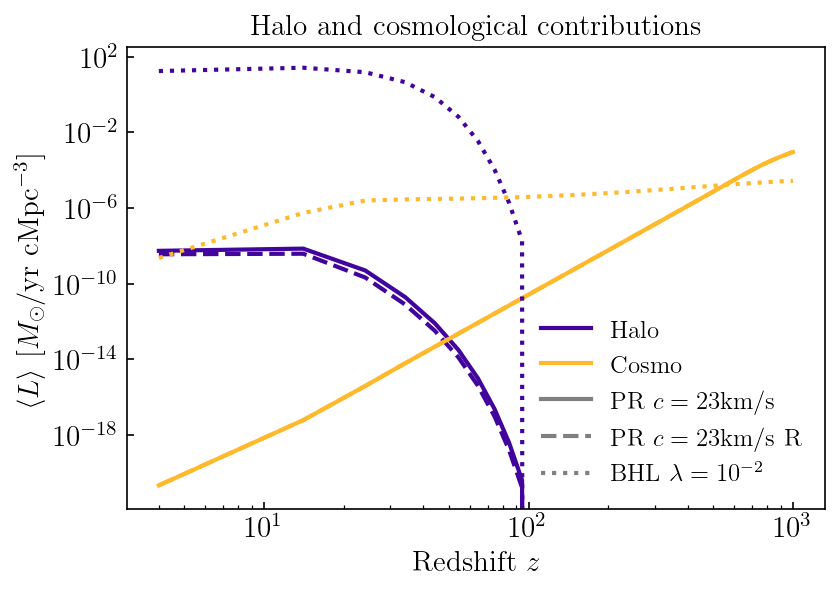

In [18]:
fig, axs = plt.subplots(1, 1, figsize=(6, 4))

ax = axs

ls_s = ['-', '--', ':']
halo_color, cosmo_color = mpl.colormaps['plasma']([0.1, 0.85])

for i in range(len(inj_s)):
    ax.plot(z_s, cf_halo_power_s[i], label=('Halo' if i==0 else None), ls=ls_s[i], color=halo_color)
    ax.plot(z_s, cf_cosmo_power_s[i], label=('Cosmo' if i==0 else None), ls=ls_s[i], color=cosmo_color)
    # ax.plot(z_s, cf_total_power_s[i], label='Total', ls=':', color='k')
    ax.plot(0, 0, label=model_latex_s[i], ls=ls_s[i], color='gray')
ax.set(xscale='log', yscale='log')
ax.set(xlabel=r'Redshift $z$', ylabel=r'$\langle L\rangle$ [$M_\odot$/yr cMpc$^{-3}$]', title=r'Halo and cosmological contributions')
ax.legend(frameon=False)

fig.savefig('pbhacc-L-z.pdf', bbox_inches='tight')